<a href="https://colab.research.google.com/github/sharon-raj-1718/cifar_10_various-cnn-_models-_with_GUI/blob/main/model3_extra_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

170500096/170498071 [==============================] - 2s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [3]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
model3 = Sequential()
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model3.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history3=model3.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat)) # Train for more number of epochs

Epoch 1/50
1563/1563 [==============================] - 44s 8ms/step - loss: 1.6007 - accuracy: 0.4103 - val_loss: 1.2485 - val_accuracy: 0.5459
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1862 - accuracy: 0.5774 - val_loss: 0.9760 - val_accuracy: 0.6559
Epoch 3/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0238 - accuracy: 0.6388 - val_loss: 0.8850 - val_accuracy: 0.6954
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9172 - accuracy: 0.6747 - val_loss: 0.8076 - val_accuracy: 0.7218
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8439 - accuracy: 0.7048 - val_loss: 0.8157 - val_accuracy: 0.7153
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7902 - accuracy: 0.7190 - val_loss: 0.8342 - val_accuracy: 0.7113
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7428 - accuracy: 0.7355 - val_loss: 0.7446 - val_ac

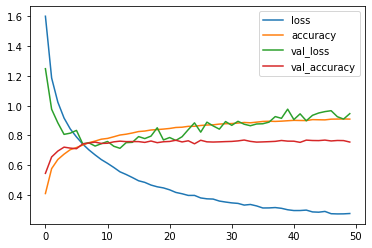

In [9]:
import pandas as pd
pd.DataFrame(history3.history).plot()



In [11]:
evaluation = model3.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.9467 - accuracy: 0.7560
Test Accuracy: 0.7559999823570251


In [12]:
model3.save("cifar10_extra_layers_filters_model.h5")